In [34]:
pd.options.display.max_columns = None

In [18]:
import pandas as pd
import numpy as np

cohort = pd.read_csv("/Users/burke/Documents/research/bpCog/combinedCohort.csv", low_memory=False)
cohort = cohort[['newid', 'visitcounter', 'SBP', 'DBP', 'bmi', 'trig', 'Smokestatus', 'choltot', 'cholhdl', 'cholldl', 
                 'age0', 'female0', 'educ0', 'daysfromvisit1', 'racebpcog', 'hba1c', 'glucosef']]

cohort['newid'] = cohort['newid'].str[2:]
cohort['newid'] = cohort['newid'].str[:-1]

cohort = cohort.assign(id=(cohort['newid']).astype('category').cat.codes)
cohort.drop(labels=['newid'], axis='columns', inplace=True)

cohort.rename(columns={'SBP' : 'sbp', 'DBP' : 'dbp', 'Smokestatus' : 'smokingStatus', 'choltot' : 'totChol',
                      "cholhdl" : 'hdl', 'cholldl' : 'ldl', 'age0' : 'baseAge', 'female0' : 'gender', 'educ0' : 'educ',
                      'hba1c' : 'a1c', 'racebpcog' : 'raceEthnicity'}, inplace=True)

cohort.gender.replace(to_replace=[0,1], value=[1, 2], inplace=True)
# have to compress "hispanic" to "other hispanic" and no representation for mexican american in BP Cog
cohort.raceEthnicity.replace(to_replace=[1,2,3,9], value=[4,3,2,5], inplace=True)

In [107]:
cohort = pd.read_csv("/Users/burke/Documents/research/bpCog/combinedCohort.csv", low_memory=False)

In [20]:
allFactorsImputation = ["a1c", "hdl", "totChol", "bmi", "dbp", "sbp", "ldl", "trig", "glucosef"]

lagVars = []

# first geneate lag variables which we'll use in teh imputatino
for factor in allFactorsImputation:
    newVarName = "lag" + factor[0].upper()+factor[1:]
    lagVars.append(newVarName)
    cohort[newVarName] = cohort.groupby(['id'])[factor].shift(1)
    cohort = cohort.join(other=cohort.groupby(['id'])[newVarName].mean(), on='id', rsuffix='mean')
    cohort.rename(columns={newVarName + "mean" : 'mean' + newVarName[0].upper() + newVarName[1:]}, inplace=True)
cohort.drop(lagVars, axis='columns', inplace=True)

cohort['age'] = cohort.baseAge + cohort.daysfromvisit1 / 365
cohort = pd.concat([cohort, pd.get_dummies(cohort['raceEthnicity'], prefix="raceEth")], axis=1)
cohort = pd.concat([cohort, pd.get_dummies(cohort['smokingStatus'], prefix="smoke")], axis=1)
cohort.drop(['baseAge', 'daysfromvisit1', 'visitcounter', 'smokingStatus', 'raceEthnicity', 'educ'], axis='columns', inplace=True)

cohort.rename(columns={'raceEth_2.0' : 'raceEth2', 'raceEth_3.0' : 'raceEth3', 'raceEth_4.0' : 'raceEth4',
                        'raceEth_5.0' : 'raceEth5', 'smoke_0.0' : 'smoke0', 'smoke_1.0' : 'smoke1' , 
                       'smoke_2.0' : 'smoke2'  }, inplace=True)



In [108]:
cohort.head()

,Unnamed: 0,newid,idno,sitenew,studyname,cohort,visitno,visitcounter,visit1dt,Visitdt,daysfromvisit1,yearsfromVisit1,age0,female0,educ0,mstatus0,insurance0,racebpcog,racenew,SBP,DBP,sbpbpcog,dbpbpcog,bmi,waist,gcp1bydesign,gcp,exf,mem,hba1c,glucosef,trig,creatin,gfr,raceold,hisp,Age,female,Smoke,smkpkyrs,afibslfrep,dbp1,dbp2,dbp3,dbpavg,sbp1,sbp2,sbp3,sbpavg,cesd_sum,cesd1_sum,cesd7_sum,dpbothered,dppoorapp,dpshakeblues,dpfocus,dpdepressed,dpeffort,dpfailure,dpfearful,dpbadsleep,dptalkless,dplonely,dpunfriendly,dpcrying,dpsad,dpdisliked,dpnotgoing,dpnotasgood,dphopeful,dphappy,dpbothered1,dppoorapp1,dpshakeblues1,dpfocus1,dpdepressed1,dpeffort1,dpfailure1,dpfearful1,dpbadsleep1,dptalkless1,dplonely1,dpunfriendly1,dpcrying1,dpsad1,dpdisliked1,dpnotgoing1,dpnotasgood1,dphopeful1,dphappy1,englishprof,coginspanish,stroketype,HxDiabetes,HxMI,Hxstroke,HxHTN,Hxafib,apoe,apoee4,APOE1,inperson,afibinc,ttoafib,afibdt,strokedt,ttostk,strokeinc,strokefatal,midefinite,midt,miinc,ttomi,miprobable,dead,deathdt,ttodeath,gcp_sansphone,mem_sansphone,exf_sansphone,mmtype,gcp_se,mem_se,exf_se,cog,healthstslfrep,alcohol,alcperday,alcperwk,waistin,waistcm,chol,choltot,cholhdl,cholldl,choltx,diabslfrep,diabetestx,htn1,htn,htntx,htnslfrep,mi,stroke,physact,Smokestatus,dpenjoy1,dpenjoy,id,mstatusmar,mstatuswid,mstatusdiv,mstatussep,mstatusnvm,mstatusnans,racehl,raceba,racewh,raceaa,raceas,racepi,racedn,educ,educhd,educmother,educfather,income,insurance,insmdcr,insmdcd,insprivate,insmil,insoutpckt,insoth,insnon,raceoth,insdk,engprof,cogtspanish,HxChol,Vars_withdata,afib,Cholmeds,diabetes,htnmeds
0,0,b'100016012504cardia',b'100016012504',13.0,b'cardia',1.0,0.0,1.0,1985-03-26 00:00:00.000000,1985-03-26 00:00:00.000000,0.0,0.0,22.0,0.0,3.0,1.0,NaN,2.0,2.0,154.0,122.0,154.0,122.0,24.030790,86.00,NaN,NaN,NaN,NaN,NaN,108.0,80.0,0.848799,123.753496,6.0,NaN,22.0,0.0,1.0,7.0,NaN,118.0,132.0,116.0,NaN,152.0,156.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.600000,389.2,NaN,86.00,0.0,161.0,40.0,105.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,2.0,NaN,NaN,b'100016012504',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,80.0,NaN,NaN,NaN,NaN
1,1,b'100016012504cardia',b'100016012504',13.0,b'cardia',1.0,2.0,2.0,1985-03-26 00:00:00.000000,1987-06-01 00:00:00.000000,797.0,2.0,22.0,0.0,3.0,1.0,NaN,2.0,2.0,126.7,97.3,126.7,97.3,23.599523,78.25,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,6.0,NaN,24.0,NaN,1.0,3.0,NaN,98.0,98.0,96.0,NaN,122.0,130.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.271429,134.9,NaN,78.25,0.0,151.0,46.0,88.0,NaN,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,b'100016012504',1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,NaN,NaN
2,2,b'100016012504cardia',b'100016012504',13.0,b'cardia',1.0,5.0,3.0,1985-03-26 00:00:00.000000,1990-06-25 00:00:00.000000,1917.0,5.0,22.0,0.0,3.0,1.0,NaN,2.0,2.0,134.0,92.7,134.0,92.7,25.823186,90.50,NaN,NaN,NaN,NaN,NaN,NaN,147.0,NaN,NaN,6.0,NaN,27.0,NaN,1.0,6.0,NaN,92.0,86.0,100.0,NaN,132.0,130.0,140.0,NaN,35.0,35.0,14.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.6

In [22]:
import statsmodels.imputation.mice as mice

def getFormulaForVariable(var):
    cols = list(cohort.columns)
    cols.remove(var)
    colStrings = [col + "+"for col in cols]
    return "".join(colStrings)[:-1]
    
imputedCohort = mice.MICEData(cohort)
binaryVars = ['smoke0', 'smoke1', 'smoke2', 'raceEth2', 'raceEth3', 'raceEth4', 'raceEth5']
for var in binaryVars:
    imputedCohort.set_imputer(var, formula=getFormulaForVariable(var), model_class="logit")
imputedCohort.update_all(20)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
imputedData = imputedCohort.data.copy()

# rebvuild categoricals
imputedData['smokingStatus'] = imputedData[['smoke0', 'smoke1', 'smoke2']].idxmax(axis=1)
imputedData['smokingStatus'] = imputedData['smokingStatus'].str[-1:]
imputedData['raceEthnicity'] = imputedData[['raceEth2', 'raceEth3', 'raceEth4', 'raceEth5']].idxmax(axis=1)
imputedData['raceEthnicity'] = imputedData['raceEthnicity'].str[-1:]

In [46]:
# drop the dummies
imputedData.drop(['smoke0', 'smoke1','smoke2'], axis='columns', inplace=True)
imputedData.drop(['raceEth2', 'raceEth3','raceEth3', 'raceEth4', 'raceEth5'], axis='columns', inplace=True)

# drop the mean variables (they were partially imputed)
imputedData.drop(list(imputedData.filter(regex='mean')), axis='columns', inplace=True)

# rebuild the mean variables off the impuated values
allFactorsImputation = ["a1c", "hdl", "totChol", "bmi","ldl", "trig", "glucosef","dbp", "sbp"]

In [48]:
for factor in allFactorsImputation:
    newVarName = "lag" + factor[0].upper()+factor[1:]
    imputedData[newVarName] = imputedData.groupby(['id'])[factor].shift(1)
    imputedData = imputedData.join(other=imputedData.groupby(['id'])[newVarName].mean(), on='id', rsuffix='mean')
    imputedData.rename(columns={newVarName + "mean" : 'mean' + newVarName[0].upper() + newVarName[1:]}, inplace=True)

In [50]:
imputedData.raceEthnicity= imputedData.raceEthnicity.astype('category')
imputedData.smokingStatus= imputedData.smokingStatus.astype('category')
imputedData.sort_values(by=['id', 'age'], inplace=True)

In [120]:
eventsFromCohort = pd.read_csv("/Users/burke/Documents/research/bpCog/combinedCohort.csv", low_memory=False)
eventsFromCohort = eventsFromCohort[['newid', 'miinc', 'strokeinc', 'strokedt', 'midt', 'Visitdt']]
eventsFromCohort.loc[((eventsFromCohort.miinc ==1) & (eventsFromCohort.strokeinc==1) & (eventsFromCohort.strokedt < eventsFromCohort.midt)), 'miinc'] = 0 
eventsFromCohort.loc[((eventsFromCohort.miinc ==1) & (eventsFromCohort.strokeinc==1) & (eventsFromCohort.midt < eventsFromCohort.strokedt)), 'strokeinc'] = 0 

eventsFromCohort.loc[((eventsFromCohort.miinc ==1) & (eventsFromCohort.strokeinc==1) & (eventsFromCohort.strokedt < eventsFromCohort.midt)), 'midt'] = np.nan 
eventsFromCohort.loc[((eventsFromCohort.miinc ==1) & (eventsFromCohort.strokeinc==1) & (eventsFromCohort.midt < eventsFromCohort.strokedt)), 'strokedt'] = np.nan


eventsFromCohort['anyIncidentEvent'] = eventsFromCohort[['strokeinc', 'miinc']].any(axis='columns')
eventsFromCohort['incidentEventDate'] = eventsFromCohort['strokedt']
eventsFromCohort['incidentEventDate'] = eventsFromCohort['strokedt']
eventsFromCohort.loc[eventsFromCohort.incidentEventDate.isnull(), 'incidentEventDate'] = eventsFromCohort.midt

In [121]:
eventsFromCohort['newid'] = eventsFromCohort['newid'].str[2:]
eventsFromCohort['newid'] = eventsFromCohort['newid'].str[:-1]
eventsFromCohort = eventsFromCohort.assign(id=(eventsFromCohort['newid']).astype('category').cat.codes)

In [145]:
combinedData = pd.concat([imputedData, eventsFromCohort], axis=1, join='inner')

In [148]:
# for people with multilple events, only coutn their first event.

combinedData.loc[((combinedData.miinc ==1) & (combinedData.strokeinc==1) & (combinedData.strokedt < combinedData.midt)), 'miinc'] = 0 
combinedData.loc[((combinedData.miinc ==1) & (combinedData.strokeinc==1) & (combinedData.midt < combinedData.strokedt)), 'strokeinc'] = 0 
combinedData['anyIncidentEvent'] = combinedData[['strokeinc', 'miinc']].any(axis='columns')
combinedData = combinedData.loc[:,~combinedData.columns.duplicated()]
incidentEvents = combinedData.loc[combinedData.anyIncidentEvent==True]


In [152]:
incidentEvents = incidentEvents.loc[incidentEvents.Visitdt > incidentEvents.incidentEventDate]

In [153]:
incidentEvents = incidentEvents.groupby('id').first()

In [162]:
import statsmodels.formula.api as statsmodel
import sys
import os
sys.path.append(os.path.abspath("../mcm/"))
from mcm.regression_model import RegressionModel

model = statsmodel.logit(formula='strokeinc ~ age + lagSbp + lagDbp + lagBmi + lagTrig + smokingStatus + gender + raceEthnicity + lagA1c', data=incidentEvents)
results = model.fit()
mcmRegressionModel = RegressionModel(results.params.to_dict(), results.bse.to_dict(), 0, 0)
mcmRegressionModel.write_json(os.path.abspath("../mcm/mcm/data/StrokeMIPartitionModelSpec.json"))


Optimization terminated successfully.
         Current function value: 0.622838
         Iterations 5


In [163]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              strokeinc   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1601
Method:                           MLE   Df Model:                           12
Date:                Tue, 16 Apr 2019   Pseudo R-squ.:                  0.1011
Time:                        07:54:52   Log-Likelihood:                -1005.3
converged:                       True   LL-Null:                       -1118.3
                                        LLR p-value:                 1.310e-41
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3110      0.670     -3.452      0.001      -3.623      -0.999
smokingStatus[T.1]    -0.2665      0.143     -1.868      0.062      -0.546       0.013
smokingStatus[T.2]    -0.0781      0.229     -0.342      0.733      -0.527       0.370
raceEthnicity[T.3]    -1.0742      0.162     -6.633      0.000      -1.392      -0.757
raceEthnicity[T.4]    -0.0519      0.179     -0.290      0.772      -0.403       0.299
raceEthnicity[T.5]    -0.1173      0.613     -0.191      0.848      -1.319       1.085
age                    0.0335      0.005      6.125      0.000       0.023       0.044
lagSbp                 0.0053      0.003      1.552      0.121      -0.001       0.012
lagDbp                -0.0065      0.005     -1.304      0.192      -0.016       0.003
lagBmi                -0.0033      0.010     -0.343      0.731      -0.022       0.015
lagTrig               -0.0003      0.000     -1.002      0.316      -0.001       0.000
gender                 0.2102      0.113      1.866      0.062      -0.011       0.431
lagA1c                 0.0218      0.029      0.749      0.454      -0.035       0.079
======================================================================================
"""

<BarContainer object of 5 artists>

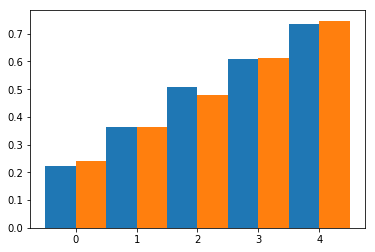

In [207]:
%matplotlib inline

import matplotlib.pyplot as pyp

resultsDF = pd.DataFrame({'predicted' : results.predict(), 'predQuintile' :pd.qcut(results.predict(), 5, labels=False),
                         'actual' : incidentEvents.strokeinc})
output = resultsDF.groupby('predQuintile')[['actual', 'predicted']].mean()



pyp.bar(np.arange(0,5)-0.25, output['actual'], width=0.5)
pyp.bar(np.arange(0,5)+0.25, output['predicted'], width=0.5)

In [ ]:
import mcm.Population